# Ejercicios 4

## Entrega Jueves 29 de Noviembre

1. Generar datos con “corrimiento al rojo” para los datos del Anillo en 2d. Para ello debemos crear mapa de velocidad: 
en una vecindad de $L/10$ de cada punto "pivote" en los datos, encontrar el punto más cercano y generar una velocidad 
para este punto pivote en la dirección del punto más cercano proporcional a su distancia $(v = 0.1dist)$. 
Guardar el nuevo punto con coordenadas

$$
\mathbf{r}=(x, y+v\cdot\hat{j})
$$

Sea $\vec{r}_1$ mi punto pivote y $\vec{r}_2$ el punto más cercano a $\vec{r}_1$. Queremos que $\vec{v}$ vaya en la dirección de $(\vec{r}_2 - \vec{r}_1)$ (unitario), por lo que

$$
\vec{v}\cdot\hat{j} = \Big(v\frac{(\vec{r}_2 - \vec{r}_1)}{|\vec{r}_2 - \vec{r}_1|}\Big)\cdot\hat{j} = (0.1dist)\frac{(\vec{r}_2 - \vec{r}_1)\cdot\hat{j}}{dist} = 0.1(y_2 - y_1)
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import distros
from scipy import spatial

In [2]:
n_points = 1000
r_int = 290.0
r_ext = 300.0
box_size = 1000.0
bin_size = 5.0
cte_prop = 0.1

In [3]:
x_anillo, y_anillo = distros.anillo_dist(n_points, r_int, r_ext, box_size / 2.0, box_size / 2.0)
points = np.vstack((x_anillo, y_anillo)).T
y_redshift = []

In [4]:
for pivot in points:
    # La siguiente función encuentra los dos puntos más cercanos al pivote. Yo me quedo
    # con el segundo, porque el primero obviamente es el propio pivote.
    dist, index = spatial.KDTree(points).query(pivot, 2, distance_upper_bound = box_size / 10.0)
    y1 = pivot[1]
    y2 = points[index[1]][1]
    y_new = y1 + cte_prop * (y2 - y1)
    y_redshift.append(y_new)

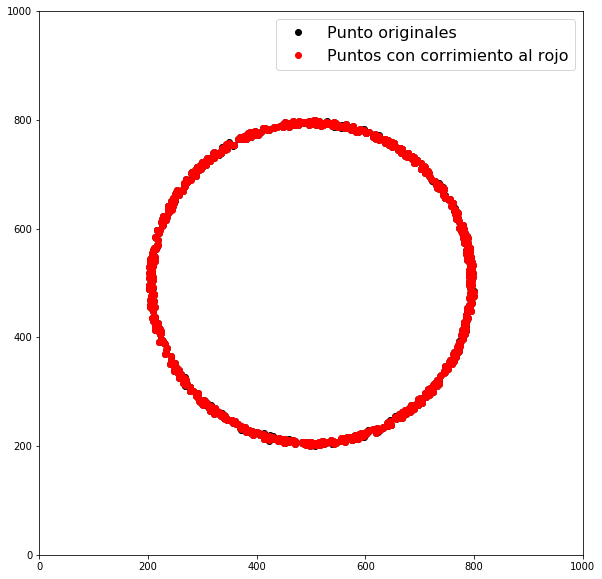

In [5]:
plt.figure(figsize = (10, 10))
plt.xlim([0.0, box_size])
plt.ylim([0.0, box_size])
plt.plot(x_anillo, y_anillo, 'ko', label = 'Punto originales')
plt.plot(x_anillo, y_redshift, 'ro', label = 'Puntos con corrimiento al rojo')
plt.legend(fontsize = 16)
plt.gca().set_aspect('equal')

Casi no se ve la diferencia porque los puntos más cercanos a cada pivote están casi a la misma altura. Con la malla de plano no habría diferencia. Si repetimos con cte. de proporcionalidad 10.0, se empieza a ver algo:

In [16]:
cte_prop2 = 10.0
y_redshift2 = []

for pivot in points:
    dist, index = spatial.KDTree(points).query(pivot, 2, distance_upper_bound = box_size / 10.0)
    y1 = pivot[1]
    y2 = points[index[1]][1]
    y_new = y1 + cte_prop2 * (y2 - y1)
    y_redshift2.append(y_new)

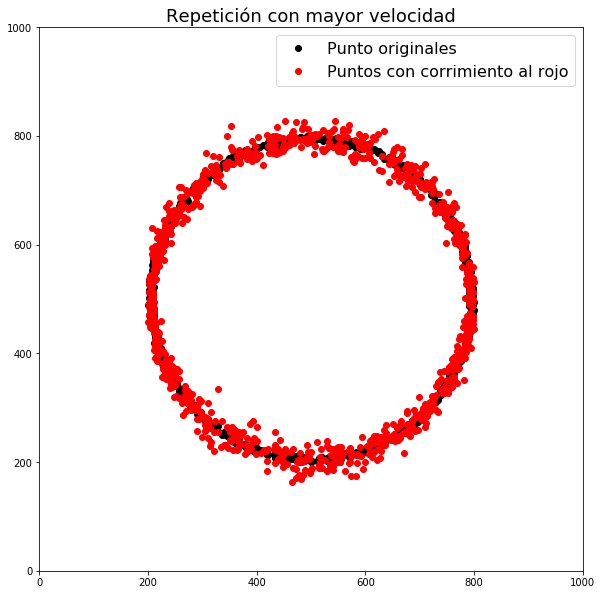

In [17]:
plt.figure(figsize = (10, 10))
plt.xlim([0.0, box_size])
plt.ylim([0.0, box_size])
plt.plot(x_anillo, y_anillo, 'ko', label = 'Punto originales')
plt.plot(x_anillo, y_redshift2, 'ro', label = 'Puntos con corrimiento al rojo')
plt.legend(fontsize = 16)
plt.gca().set_aspect('equal')
plt.title('Repetición con mayor velocidad', fontsize = 18);

2. Cambiar el código de la función de correlación con estimador de Landy-Salay, para que sea anisotrópico y guarde la componente  de cada distancia en X y Y. 

In [6]:
# Función para crear histogramas DD y RR para un solo eje coordenado
def save_hist_ax(data, box_size, bin_size):
    n_points = len(data)
    distances = []
    bins = np.arange(0.0, box_size, bin_size)
    
    for i in range(n_points - 1):
        for j in range(i + 1, n_points):
            distance = data[i] - data[j]
            distances.append(distance)
    
    histo = np.histogram(distances, bins = bins)
    return distances, histo

In [7]:
# Función para crear histograma DR para un solo eje coordenado
def save_hist_DR_ax(data1, box_size1, data2, box_size2, bin_size):
    max_dist = max(box_size2, box_size1)
    n1 = len(data1)
    n2 = len(data2)
    distances = []
    bins = np.arange(0.0, max_dist, bin_size)
    
    for i in range(n1 - 1):
        for j in range(i + 1, n2):
            distance = data1[i] - data2[j]
            distances.append(distance)
    
    histo = np.histogram(distances, bins = bins)
    return distances, histo

In [13]:
# Función que saca todos los histogramas separando los ejes coordenados
def saca_los_XX_ax(x_data, y_data, nR, box_size, bin_size):
    x_RR, y_RR = distros.create_rand_dist(box_size, nR)
    dist_RR_x, histo_RR_x = distros.save_hist_ax(x_RR, box_size, bin_size)
    dist_RR_y, histo_RR_y = distros.save_hist_ax(y_RR, box_size, bin_size)
    dist_DD_x, histo_DD_x = distros.save_hist_ax(x_data, box_size, bin_size)
    dist_DD_y, histo_DD_y = distros.save_hist_ax(y_data, box_size, bin_size)
    dist_DR_x, histo_DR_x = distros.save_hist_DR_ax(x_data, box_size, x_RR, box_size, bin_size)
    dist_DR_y, histo_DR_y = distros.save_hist_DR_ax(y_data, box_size, y_RR, box_size, bin_size)
    nD = len(x_data)
    inv_nest = math.sqrt(nR * (nR - 1.0) / (nD * (nD - 1.0)))
    RR_x = histo_RR_x[0]
    RR_y = histo_RR_y[0]
    DD_x = histo_DD_x[0]
    DD_y = histo_DD_y[0]
    DR_x = histo_DR_x[0]
    DR_y = histo_DR_y[0]
    bins = histo_DD_x[1]
    bins = bins[:-1]
    
    return bins, RR_x, RR_y, DD_x, DD_y, DR_x, DR_y, inv_nest

La función landy_szalay() de distros.py no necesita modificarse.

   a) Con este código calcular la función de correlación anisotrópica del ejercicio anterior 
   y graficarla como gráfica de densidad en $2d$ (se puede usar imshow de matplotlib).

In [14]:
n_anillo = len(x_anillo)
n_random = 5 * n_anillo
bins, RR_x, RR_y, DD_x, DD_y, DR_x, DR_y, inv_nest = saca_los_XX_ax(x_anillo, y_anillo, n_random, box_size, bin_size)

In [15]:
f_corr_x = distros.landy_szalay(DD_x, RR_x, DR_x, inv_nest)

In [16]:
f_corr_y = distros.landy_szalay(DD_y, RR_y, DR_y, inv_nest)

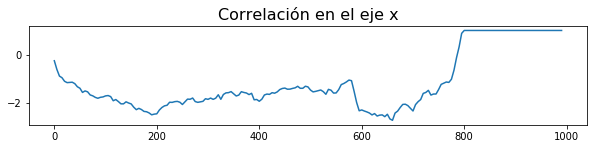

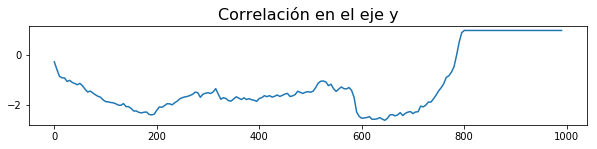

In [24]:
plt.figure(figsize = (10, 4))
plt.subplot(2, 1, 1)
plt.plot(bins, f_corr_x)
plt.title("Correlación en el eje x", fontsize = 16);

plt.figure(figsize = (10, 4))
plt.subplot(2, 1, 2)
plt.plot(bins, f_corr_y)
plt.title("Correlación en el eje y", fontsize = 16);

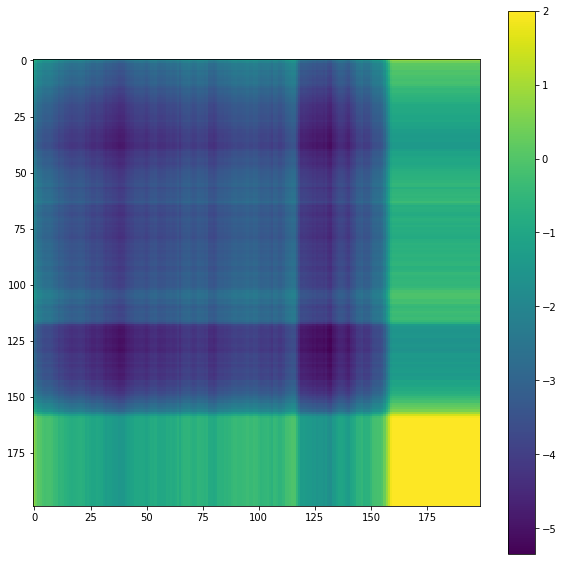

In [26]:
plt.figure(figsize = (10, 10))
X, Y = np.meshgrid(f_corr_x, f_corr_y)
fxy = X + Y
plt.imshow(fxy)
plt.colorbar()

   b) (BONUS) Descomponer en la base de Legendre para encontrar el monopolo, cuadrupolo y hexadecapolo. 
   Graficarlos todos en un mismo plot. [Para realizar este ejercicio debes cambiar la función de correlación a coordenadas polares]